In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
# read data menggunakan pandas

df = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx')

## **a. Problem Statement**

Seperti yang kita ketahui bahwa virus Covid-19 menular melalui kontak langsung dengan percikan dahak dari orang yang terinfeksi (melalui batuk dan bersin), dan jika menyentuh permukaan yang terkontaminasi virus. Virus ini dapat bertahan selama beberapa jam di permukaan, tetapi disinfektan sederhana dapat mengatasinya **(WHO, 2020)**.  

Disinfektan dapat membunuh virus ini dikarenakan sifat dari sabun yang dapat merusak membran sel yang membungkus inti virus ini. Namun mengatasi virus Covid-19 dengan disinfektan saja tidak begitu optimal, dikarenakan membutuhkan anggran yang cukup untuk kegiatan yang banyak dan juga harus melakukan sterilisasi terus menerus **(Kemenkes, 2021)**.

Maka perlu treatment lain yang lebih optimal untuk mengatasi penyebaran virus Covid-19 ini. Pemerintah telah melakukan suatu kebijakan dengan menerapkan aturan menggunakan masker dan menjaga jarak saat berkomunikasi namun apabila melihat daata, kasus Covid-19 terdapat peningkatan drastis diwaktu-waktu tertentu. Maka perlu kita dilakukan analisa data untuk menambah eksperience terhadap kasus Covid-19 tersebut.

**Tujuan** : Adapun tujuan dari penelitian "Daily Update Data Agregat Covid-19 Jakarta.xlsx"
1. Mengetahui penyebab melonjaknya kenaikan positif perbulan Covid-19 pada bulan tertentu.
2. Menelaah mengenai kebijakan yang diterapkan oleh pemerintah dapat berdampak bagi penurunan dan peningkatan positif perbulan Covid-19.
3. Membuat suatu model Machine Learning untuk memprediksi banyaknya OTG sebagai penyebab menularnya virus Covid-19.

## **b. Data Cleaning and Preprocessing**

In [3]:
# tunjukan 5 data teratas
df.head(5)

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN


In [4]:
# cek dimensi data atau banyak kolom dan baris yang dimiliki data
df.shape

(844, 14)

In [5]:
# cek mengenai data null
df.isna().sum()

Tanggal              0
Jam                844
Tanggal Jam        844
Meninggal            0
Sembuh               0
Self Isolation       0
Masih Perawatan      0
Total Pasien         0
Positif Harian       0
Positif Aktif        0
Sembuh Harian        0
Tanpa Gejala       140
Bergejala          140
Belum Ada Data     140
dtype: int64

1. Data kolom ["Jam", "Tanggal Jam"] akan dibuang karena memiliki percsentase data null sebesar 100% dari banyak baris data.
2. Data pada kolom ["Tanpa Gejala", "Bergejala", "Belum Ada Data"] kosong mulai dari tanggal 01-Maret-2020 sampai dengan 140 hari kemudian atau kosong sampai tanggal 18-Juli-2020. Memungkinkan bahwa saat itu pengisi data tidak terpikirkan untuk mengambil data berupa "Tanpa Gejala", Bergejala" dan "Belum Ada Data", maka kita akan manghapuskan data baris yang kosong tersebut.

In [6]:
# hapus Kolom "Jam" dan "Tanggal Jam"
df.drop(columns=['Jam','Tanggal Jam'], inplace=True)

# hapus Baris Null
df.dropna(inplace=True)

df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [7]:
# Kemudian kita akan lihat mengenai info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          704 non-null    datetime64[ns]
 1   Meninggal        704 non-null    int64         
 2   Sembuh           704 non-null    int64         
 3   Self Isolation   704 non-null    int64         
 4   Masih Perawatan  704 non-null    int64         
 5   Total Pasien     704 non-null    int64         
 6   Positif Harian   704 non-null    int64         
 7   Positif Aktif    704 non-null    int64         
 8   Sembuh Harian    704 non-null    int64         
 9   Tanpa Gejala     704 non-null    float64       
 10  Bergejala        704 non-null    float64       
 11  Belum Ada Data   704 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 66.1 KB


pada columns "Tanpa Gejala", "Bergejala", "Belum Ada Data" perlu ditransform ke tipe data int64

In [8]:
# transforn data 'float64' ke 'int64'
df[['Tanpa Gejala', 'Bergejala', 'Belum Ada Data']] = df[['Tanpa Gejala', 'Bergejala', 'Belum Ada Data']].astype('int64')

In [9]:
# buat kolom tahun/bulan
df['Tahun/Bulan'] = df['Tanggal'].dt.strftime('%Y-%m')

## **c. Exploratory Data Analysis**

In [40]:
df.head()

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Tahun/Bulan
0,2020-07-19,748,10444,4236,923,16351,313,5159,327,8503,5362,2486,2020-07
1,2020-07-20,749,10602,4335,1026,16712,361,5361,158,8356,5760,2596,2020-07
2,2020-07-21,758,10864,4458,1073,17153,441,5531,262,8577,5832,2744,2020-07
3,2020-07-22,766,11187,4383,1193,17529,376,5576,323,8767,5962,2800,2020-07
4,2020-07-23,767,11302,4675,1201,17945,416,5876,115,8770,6283,2892,2020-07


Dari dataset di atas, terdapat kolom **Total Pasien** yang adalah total dari kolom **Meninggal, Sembuh, Self Isolation, Masih Perawatan**. kolom **Total Pasien** juga merupakan total dari kolom **Tanpa Gejala, Bergejala** dan **Belum Ada Data**.

In [10]:
# informasi statistikal
df[['Positif Harian', 'Sembuh Harian', 'Tanpa Gejala']].describe()

,Positif Harian,Sembuh Harian,Tanpa Gejala
count,704.000000,704.000000,704.000000
mean,1768.190341,1745.223011,3671.617898
std,2692.813975,2941.186302,6075.815882
min,14.000000,20.000000,0.000000
25%,283.250000,238.000000,8.000000
50%,889.000000,887.000000,855.000000
75%,1728.750000,1651.500000,5882.750000
max,15825.000000,20570.000000,35311.000000


1. Positif Harian 
    * Rata-rata **Positif Harian** sebesar 1768.19 perharinya dengan std sebesar 2692.81 maka std > mean menggambarkan **Positif Harian** di Jararta sangatlah beragam, tidak dapat diwakilkan positif perharinya dengan menggunakan nilai mean. Namun pernah terjadi Positif Harian terbanyak di kota Jakarta sebesar 15825 orang dan kasus paling sedikit perhari adalah sebesar 14 orang.
2. Sembuh Harian
    * Rata-rata **Sembuh Harian** sebesar 1745.22 perharinya dengan std sebesar 2941.18 maka std > mean juga menggambarkan **Sembuh Harian** di Jakarta sangatlah beragam, tidak dapat diwakilkan sembuh perharinya dengan menggunakan nilai mean. Berita baiknya, pernah terjadi kasus sembuh di Jakarta sebanyak 20570 orang.
3. Tanpa Gejala
    * Rata-rata **Tanpa Gejala** sebesar 3671.61 perharinya dengan nilai std sebesar 6075.81 maka std > mean juga menggambarkan **Tanpa Gejala** di Jakarta sangatlah beraga, tidak dapat diwakilkan orang tanpa gejala perhari dengan menggunakan nilai mean.

In [11]:
# tunjukan tanggal mulai pendataan
(df.Tanggal.min()) , (df.Tanggal.max())

(Timestamp('2020-07-19 00:00:00'), Timestamp('2022-06-22 00:00:00'))

Data yang kita miliki adalah data yang bermula dari tanggal 19-Juli-2020 s.d 22-Juni-2022 maka pada data awal telah memiliki pasien, dll. Seperti yang kita ketahui bahwa kasus Covid-19 di Indonesia bermulai pada bulan Februari-2020

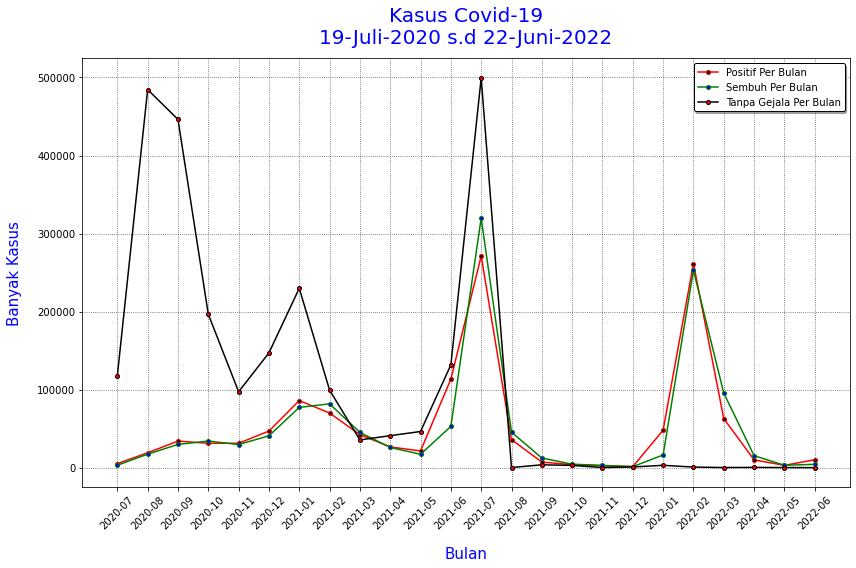

In [12]:
# Akan ditampilkan Kasus Positif per Bulan KPB mulai dari 19-Juli-2020 s.d 22-Juni-2022
KPB = df.groupby('Tahun/Bulan')['Positif Harian', 'Sembuh Harian', 'Tanpa Gejala', 'Bergejala'].sum()

plt.figure(figsize=(12, 8))
plt.title('Kasus Covid-19\n19-Juli-2020 s.d 22-Juni-2022', fontsize=20, pad=15, color='blue')
KPB['Positif Harian'].plot(color='red', marker='o', markerfacecolor='black', label='Positif Per Bulan', markersize=4)
KPB['Sembuh Harian'].plot(color='green', marker='o', markerfacecolor='blue', label='Sembuh Per Bulan', markersize=4)
KPB['Tanpa Gejala'].plot(color='black', marker='o', markerfacecolor='red', label='Tanpa Gejala Per Bulan', markersize=4)
# KPB['Bergejala'].plot(color='yellow', marker='o', markerfacecolor='green', label='Tanpa Gejala Per Bulan', markersize=4)
plt.grid(linestyle=':', alpha=0.7, color='black')
plt.legend(shadow=True, edgecolor='black')
plt.ylabel('Banyak Kasus', color='blue', labelpad=15, fontsize=15)
plt.xlabel('Bulan', color='blue', labelpad=15, fontsize=15)
plt.xticks(ticks=[n for n in range(len(KPB))], labels=[n for n in KPB.index], rotation=45)
plt.tight_layout()
plt.savefig('Grafik Kasus Covid-19 19-Juli-2020 s.d 22-Juni-2022.png')

1. Setelah melakukan Exploratory Data Analyst, kita bisa melihat Grafik kasus Covid-19 dari 19-Juli-2020 s.d 22-Juni-2022 dimana terdapat kenaikan positif perbulan Covid-19 yang cukup drastis pada bulan-bulan tertentu. Yaitu pada bulan Januari-2021, Juli-2021 dan Februari-2022. Kemudian kita coba untuk mengaitkan hari raya dan kebijakan apa saja yang terjadi pada Januari-2021, Juni-2021, Juli-2021 dan Februari-2022 adalah sebagai berikut.

    * Januari-2021 : terdapat acara penyambutan tahun baru.
    * Juni-2021 : kebijakan pemerintah mengenai vaksin satu
    * Juli-2021 : terdapat hari raya Idul Adha.
    * Februari-2022 : pelonggaran kebijakan mengenai diperbolehkannya mudik.
    
    Kebijakan pemerintah mengenai larangan mudik pada hari raya Idul Adha Juli-2021 namun disepelekan oleh masyarakat menjadi alasan terjadinya ledakan positif perbulan Covid-19 tertinggi sebesar 271185 orang. Kita ketahui bersama bahwa untuk pertama kalinya setelah Covid-19 menyebar pemerintah mengizinkan masyarakatnya untuk dapat mudik kembali.
    
    Kemudian pada Januari-2021 kebijakan pemerintah mengenai larangan untuk mudik masih sangat ketat yang mengakibatkan lonjakan penyebaran virus Covid-19 dapat diredam bisa terlihat pada bulan selanjutnya tidak terjadi ledakan positif perbulan Covid-19. Namun, pada hari raya penyambutan tahun baru Januari-2022 sepertinya tidak teratasi dengan baik, terjadi ledakan positif perbulan Covid-19 pada bulan Februari-2022 dengan banyak positif perbulan sebesar 261484 orang.

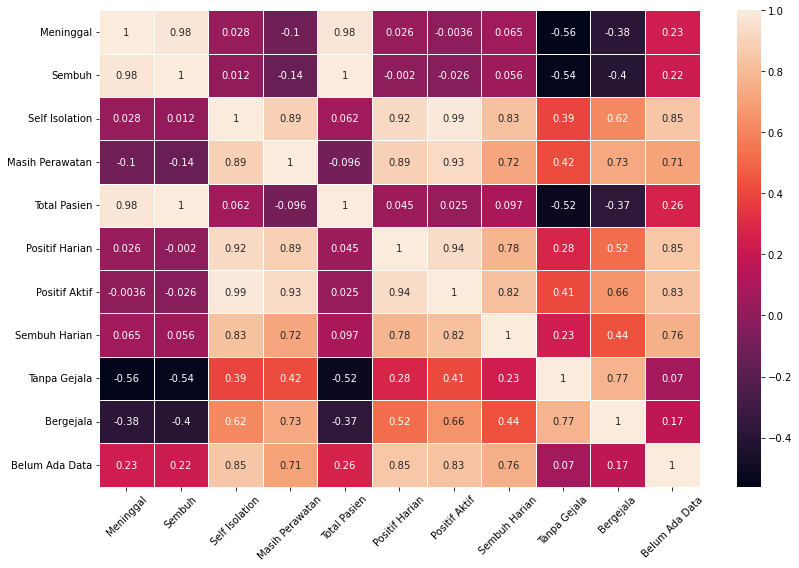

In [38]:
# akan ditujukan korelasi antar columns
corelation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True, linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correlation.png')

2. Setelah mengaitkan adanya dampak hari raya dan kebijakan terhadap penurunan dan peningkatan penyebaran virus Covid-19, kami melihat adanya korelasi data kolom "Tanpa Gejala" dengan "Bergejala", "Positif Harian" dan "Positif Aktif" adapun nilai korelasi nya adalah sebagai berikut.
    * Tanpa Gejala <---> Bergejala : 0.77
    * Tanpa Gejala <---> Positif Harian : 0.28
    * Tanpa Gejala <---> Positif Aktif : 0.41

    Hal tersebut membuat suatu informasi bahwa banyak orang tanpa gejala menjadi salah satu masalah dalam penyebaran virus ini, dikarenakan tidak diketahuinya orang satu dan lainnya berpeluang untuk menyebarkan virus Covid-19, Maka perlu bagi kami untuk memprediksi banyak orang tanpa gejala yang ada dari waktu ke waktu sebagai suatu pertimbangan untuk mengambil sebuah kebijakan.

## **d. Modeling**

Yang akan menjadi target dalam data Covid-19 ini merupakan banyak orang yang yang Tanpa Gejala saat kondisi tertentu. Menurut saya hal ini perlu diprediksi dikarenakan orang tanpa gejala merupakan permasalahan utama penyebaran virus Covid-19. Tingkat kewaspadaan seseorang akan lebih tinggi apabila dia telah mengetahui orang disekitarnya merupakan pembawa virus Covid-19. Namun berbeda halnya terhadap orang tanpa gejala, kita tidak dapat menebak apakah seseorang pembawa virus Covid-19 atau bukan, maka dengan mengetahui seberapa banyak orang tanpa gejala bisa memberikan kewaspadaan bagi masyarakat.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from jcopml.plot import plot_confusion_matrix

In [15]:
x = df.drop(columns=['Tanpa Gejala', 'Tahun/Bulan', 'Tanggal'])
y = df['Tanpa Gejala']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)
print(f'1. x_train shape : {x_train.shape}')
print(f'2. y_train shape : {y_train.shape}')
print(f'3. x_test shape  : {x_test.shape}')
print(f'4. y_test shape  : {y_test.shape}')

1. x_train shape : (563, 10)
2. y_train shape : (563,)
3. x_test shape  : (141, 10)
4. y_test shape  : (141,)


### **1. Model Suport Vector Regression**

In [16]:
# buat pipeline untuk model SVR
# numeric pipeline
num_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

# processor pipeline
processor = ColumnTransformer([
    ('numerical', num_pipe, x_train.columns),
])

# algorithm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', SVR(max_iter=500))
])

# model
model = GridSearchCV(pipeline, gsp.svm_params, cv=3)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', model.best_score_)
print('3. Train Score    :', model.score(x_train, y_train))
print('4. Test Score     :', model.score(x_test, y_test))

1. Best Parameter : {'algo__C': 1000.0, 'algo__gamma': 0.1}
2. Best Score     : 0.6443570897810954
3. Train Score    : 0.7165701913752134
4. Test Score     : 0.6035259172585496


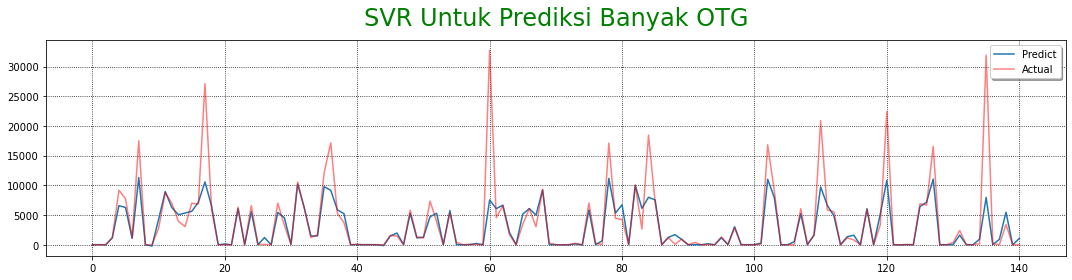

In [17]:
y_pred = model.predict(x_test)

x = [n for n in range(len(x_test))]

plt.figure(figsize=(15, 4))
plt.title('SVR Untuk Prediksi Banyak OTG', color='green', pad=15, fontsize=24)
plt.plot(x, y_pred, label='Predict')
plt.plot(x, y_test, color='red', alpha=0.5, label='Actual')
plt.legend(shadow=True)
plt.grid(linestyle=':', color='black')
plt.tight_layout()
plt.show()

### **2. Model Decision Tree Regressor**

In [18]:
# buat pipeline untuk model SVR
# numeric pipeline
num_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

# processor pipeline
processor = ColumnTransformer([
    ('numerical', num_pipe, x_train.columns),
])

# algorithm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', DecisionTreeRegressor())
])

params = {'algo__max_depth' : [n for n in range(10, 100, 20)],
          'algo__max_depth' : [n for n in range(3, 10, 2)],
          'algo__max_features' : ['auto', 'sqrt', 'log2'],
          'algo__min_samples_split' : [2, 4, 6]
         }

# model
model = GridSearchCV(pipeline, param_grid=params, cv=3)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', model.best_score_)
print('3. Train Score    :', model.score(x_train, y_train))
print('4. Test Score     :', model.score(x_test, y_test))

1. Best Parameter : {'algo__max_depth': 9, 'algo__max_features': 'sqrt', 'algo__min_samples_split': 6}
2. Best Score     : 0.9494263300705937
3. Train Score    : 0.9894115084596659
4. Test Score     : 0.9570761581953033


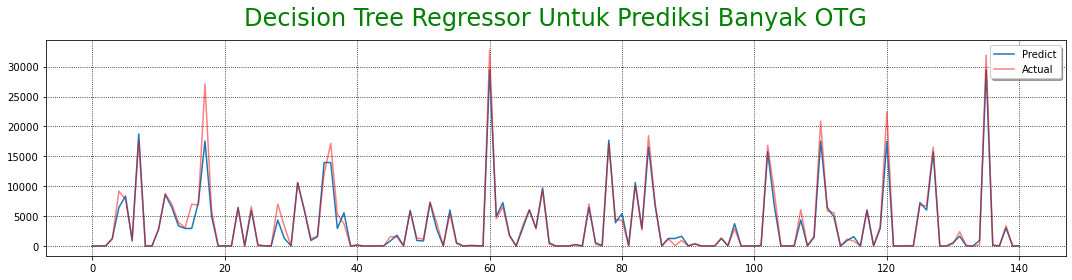

In [19]:
y_pred = model.predict(x_test)

x = [n for n in range(len(x_test))]

plt.figure(figsize=(15, 4))
plt.title('Decision Tree Regressor Untuk Prediksi Banyak OTG', color='green', pad=15, fontsize=24)
plt.plot(x, y_pred, label='Predict')
plt.plot(x, y_test, color='red', alpha=0.5, label='Actual')
plt.legend(shadow=True)
plt.grid(linestyle=':', color='black')
plt.tight_layout()
plt.show()

### **3. Model KNeighbors Regerssor**

In [20]:
# buat pipeline untuk model SVR
# numeric pipeline
num_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

# processor pipeline
processor = ColumnTransformer([
    ('numerical', num_pipe, x_train.columns),
])

# algorithm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', KNeighborsRegressor())
])

# model
model = GridSearchCV(pipeline, param_grid=gsp.knn_params, cv=3)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', model.best_score_)
print('3. Train Score    :', model.score(x_train, y_train))
print('4. Test Score     :', model.score(x_test, y_test))

1. Best Parameter : {'algo__n_neighbors': 3, 'algo__p': 1, 'algo__weights': 'distance'}
2. Best Score     : 0.9642930530451245
3. Train Score    : 1.0
4. Test Score     : 0.9686972405572317


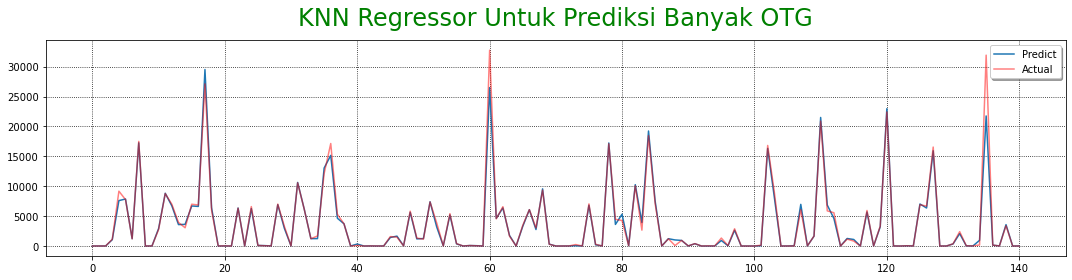

In [21]:
y_pred = model.predict(x_test)

x = [n for n in range(len(x_test))]

plt.figure(figsize=(15, 4))
plt.title('KNN Regressor Untuk Prediksi Banyak OTG', color='green', pad=15, fontsize=24)
plt.plot(x, y_pred, label='Predict')
plt.plot(x, y_test, color='red', alpha=0.5, label='Actual')
plt.legend(shadow=True)
plt.grid(linestyle=':', color='black')
plt.tight_layout()
plt.show()

### **4. Model Linear Regresion**

In [22]:
# buat pipeline untuk model SVR
# numeric pipeline
num_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

# processor pipeline
processor = ColumnTransformer([
    ('numerical', num_pipe, x_train.columns),
])

# algorithm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', LinearRegression())
])

# model
model = GridSearchCV(pipeline, gsp.linreg_params, cv=3)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', model.best_score_)
print('3. Train Score    :', model.score(x_train, y_train))
print('4. Test Score     :', model.score(x_test, y_test))

1. Best Parameter : {'algo__fit_intercept': True}
2. Best Score     : 0.7953263441956512
3. Train Score    : 0.8097772694007456
4. Test Score     : 0.8135925907149235


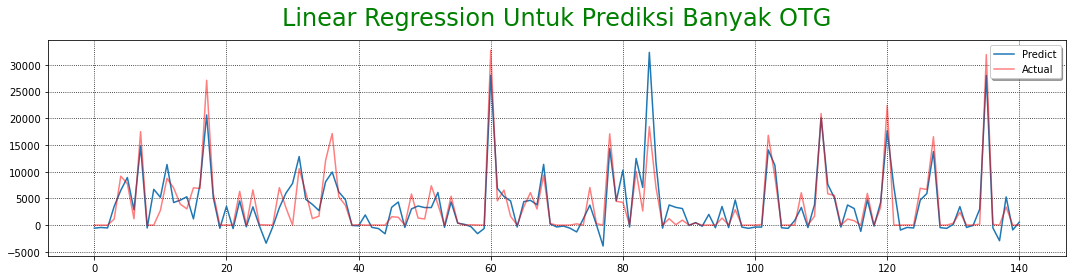

In [23]:
y_pred = model.predict(x_test)

x = [n for n in range(len(x_test))]

plt.figure(figsize=(15, 4))
plt.title('Linear Regression Untuk Prediksi Banyak OTG', color='green', pad=15, fontsize=24)
plt.plot(x, y_pred, label='Predict')
plt.plot(x, y_test, color='red', alpha=0.5, label='Actual')
plt.legend(shadow=True)
plt.grid(linestyle=':', color='black')
plt.tight_layout()
plt.show()

### **5. Model Logistic Regresion**

In [24]:
# buat pipeline untuk model SVR
# numeric pipeline
num_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

# processor pipeline
processor = ColumnTransformer([
    ('numerical', num_pipe, x_train.columns),
])

# algorithm pipeline
pipeline = Pipeline([
    ('proces', processor),
    ('algo', LogisticRegression())
])

# model
model = GridSearchCV(pipeline, gsp.logreg_params, cv=3)
model.fit(x_train, y_train)

print('1. Best Parameter :', model.best_params_)
print('2. Best Score     :', model.best_score_)
print('3. Train Score    :', model.score(x_train, y_train))
print('4. Test Score     :', model.score(x_test, y_test))

1. Best Parameter : {'algo__C': 10.0, 'algo__fit_intercept': True}
2. Best Score     : 0.2060530208214814
3. Train Score    : 0.3960923623445826
4. Test Score     : 0.12056737588652482


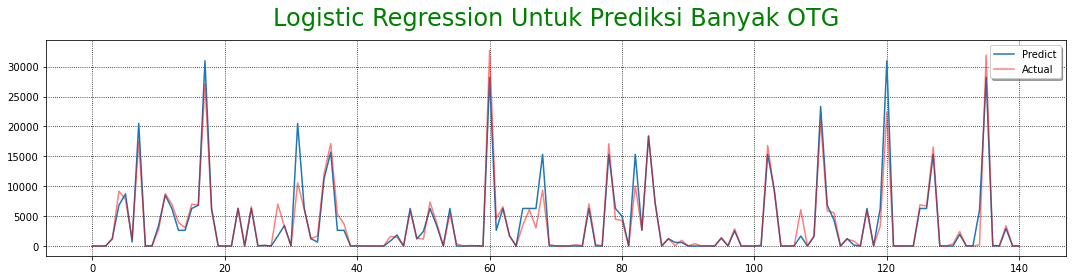

In [25]:
y_pred = model.predict(x_test)

x = [n for n in range(len(x_test))]

plt.figure(figsize=(15, 4))
plt.title('Logistic Regression Untuk Prediksi Banyak OTG', color='green', pad=15, fontsize=24)
plt.plot(x, y_pred, label='Predict')
plt.plot(x, y_test, color='red', alpha=0.5, label='Actual')
plt.legend(shadow=True)
plt.grid(linestyle=':', color='black')
plt.tight_layout()
plt.show()

### **6. Report Accuracy Score Model Machine Learning**

3. Kami telah membuat 5 jenis Model Machine Learning untuk memprediksi banyak orang tanpa gejala. Adapun accuracy yang ditunjukan dari data training dan data testing untuk memprediksi adalah sebagai berikut.
    * Suport Vector Regressor (SVR)
        1. Train Score    : 0.7165701913752134
        2. Test Score     : 0.6035259172585496
    * Decision Tree Regressor
        1. Train Score    : 0.9966031985800855
        2. Test Score     : 0.9136821000400102
    * KNeighbors Regressor
        1. Train Score    : 1.0
        2. Test Score     : 0.9686972405572317
    * Linear Regresion
        1. Train Score    : 0.8097772694007456
        2. Test Score     : 0.8135925907149235
    * Logistic Regresion
        1. Train Score    : 0.3960923623445826
        2. Test Score     : 0.12056737588652482
        
    Pada sesi kali ini, kami tidak mempertimbangkan masalah overfit yang ditunjukan dari accuracy Model Machine Learning yang ada.

## **e. Conclusion**

1. Lonjakan kenaikan Covid-19 pada bulan-bulan tertentu diakibatkan adanya acara atau kebijakan-kebijakan baru yang diatur oleh pemerintah. 
2. Berikut kebijakan pemerintah yang yang berdampak bagi penurunan dan peningkatan positif perbulan Covid=19.
    * Larangan untuk mudik pada Juli-2020 dengan total positif perbulan sebesar 5163 orang. ketika larangan untuk mudik dilonggarkan pada Juli-2021 kenaikan positif perbulan menjadi sebesar 271185 orang.
    * Kebijakan vaksin pertama dimulai pada Juli-2021, namun terlihat pada bulan Juli-2021 sampai dengan Juni-2021 mengalami peningkatan positif perbulan yang sangat drastis. Efek dari vaksin mulai dirasakan pada Agustus-2021 s.d Desember-2021. 
    * Larangan untuk mudik pada acara tahun baru 2021 cukup dapat menekan positif perbulan yaitu sebesar 85983 orang pada Januari-2021 kemudian menurun menjadi 70017 orang pada Februari-2022. Namun, ketika larangan itu mulai dilonggarkan pada tahun 2022, positif perbulan pada Februari-2022 menjadi 261484 orang.
3. KNeighbors Regressor merupakan model terbaik untuk memprediksikan banyak **Tanpa Gejala** dengan report accuracy sebagai berikut.
    * Train Score    : 1.0
    * Test Score     : 0.9686972405572317

    Adapun inputan yang diperlukan untuk memprediksi banyak **Tanpa Gejala** adalah sebagai berikut.
    * Meninggal
    * Sembuh
    * Self Isolation
    * Masih Perawatan
    * Total Pasien
    * Positif Harian
    * Positif Aktif
    * Sembuh Harian
    * Bergejala
    * Belum Ada Data


## **f. Daftar Pustaka**

1. World Health Organization. (2020). https://www.who.int/indonesia/news/novel-coronavirus/qa/qa-how-is-covid-19-transmitted
2. Kemenkes RI. (2021). https://covid19.kemkes.go.id/download/Panduan_Desinfeksi_dalam_Rangka_Pencegahan_Penularan_Covid19.pdf